#DSC 672 Project by Vikram Kalister and Shreyas Ravi

## Importing Packages

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sklearn.__version__

'1.0.2'

In [ ]:
!pip install pymc3==3.10
!pip install arviz==0.10
!pip install pgmpy

     |████████████████████████████████| 1.9 MB 5.4 MB/s 
     |████████████████████████████████| 2.8 MB 36.3 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.0.11-py3-none-any.whl size=2572038 sha256=a28d65d48323245585c483d3f61751b495a55dc1d7fac8772efb705c9dd19c18
  Stored in directory: /root/.cache/pip/wheels/45/cd/5b/6b7f84f36d564107f0786ce959bcb7641e07c764cb9abdf222
Successfully built theano-pymc
  Attempting uninstall: theano-pymc
    Found existing installation: Theano-PyMC 1.1.2
    Uninstalling Theano-PyMC-1.1.2:
      Successfully uninstalled Theano-PyMC-1.1.2
  Attempting uninstall: pymc3
    Found existing installation: pymc3 3.11.4
    Uninstalling pymc3-3.11.4:
      Successfully uninstalled pymc3-3.11.4
     |████████████████████████████████| 1.5 MB 5.1 MB/s 
  Attempting uninstall: arviz
    Found existing installation: arviz 0.12.0
    Uninstalling arviz-0.12.0:
      Successfully uninstalled arviz-0.12.0
     |████████████████████████████████| 1.9 MB 5.1 MB

In [ ]:
import pymc3 as pm
import arviz as az

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('cardio_train-1.csv', sep = ";")

In [ ]:
df.info()
df["age"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [ ]:
df["Age"] = df["age"]/365
del df["age"]
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.873973


In [ ]:
df["age"] = df["Age"].round()
del df["Age"]
df.head()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [ ]:
df = df[["id", "age", "gender", "height",	"weight",	"ap_hi",	"ap_lo",	"cholesterol",	"gluc",	
         "smoke",	"alco",	"active",	"cardio"]]
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


Text(0.5, 1.0, 'Correlation Plot')

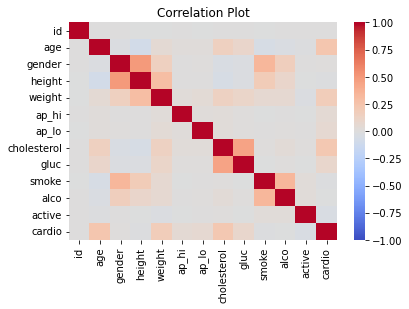

In [ ]:
sns.heatmap(data = df.corr(), vmin = -1, vmax = 1, cmap = "coolwarm")
plt.title("Correlation Plot")

Text(0.5, 1.0, 'Presence of Heart Disease based on activity')

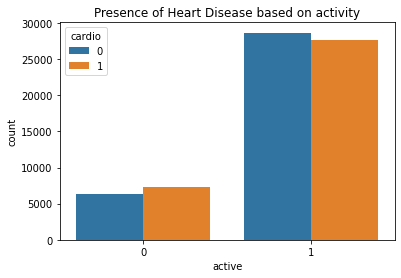

In [ ]:
sns.countplot(x = "active", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on activity")

Text(0.5, 1.0, 'Presence of Heart Disease based on age')

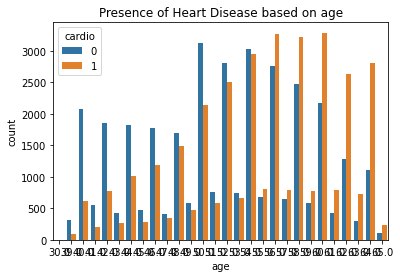

In [ ]:
sns.countplot(x = "age", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on age")

Text(0.5, 1.0, 'Presence of Heart Disease based on cholesterol')

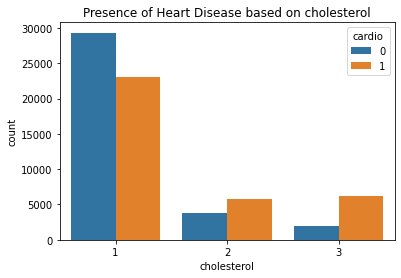

In [ ]:
sns.countplot(x = "cholesterol", hue = "cardio", data = df)
plt.title("Presence of Heart Disease based on cholesterol")

In [ ]:
X = df.drop("cardio", axis = 1)
y = df["cardio"]

## Multicolinearity & Feature Selection

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X = df[list(df.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)
# High VIF indicates that there's multicollinearity

,VIF,Column
3,102.740256,height
1,58.029142,age
4,31.875103,weight
2,11.767060,gender
8,7.045572,gluc
7,6.710975,cholesterol
11,5.064418,active
0,3.978620,id
12,2.267352,cardio
5,1.704923,ap_hi


## Models Used
1. Decision Trees
2. Random Forest Classifier
3. Naive Bayes
4. Support Vector Machines (SVM)
5. Support Vector Machines (PCA) **OPTIONAL**
6. Bayesian Analysis

## Preparing Data for Machine Learning

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
dt = DecisionTreeClassifier(random_state = 40)
dt.fit(X_train,y_train)
pred_train = dt.predict(X_train)
print("Accuracy Train", metrics.accuracy_score(y_true = y_train, y_pred = pred_train))

pred = dt.predict(X_test)
print("Accuracy Test", metrics.accuracy_score(y_true = y_test, y_pred = pred))

Accuracy Train 1.0
Accuracy Test 1.0


In [ ]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10461
           1       1.00      1.00      1.00     10539

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



### Grid Search for Decision Trees

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
RF = RandomForestClassifier()

In [ ]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
pred = RF.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred)

1.0

In [ ]:
pred_test = RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = pred_test)

1.0

In [ ]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10461
           1       1.00      1.00      1.00     10539

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



### Grid Search for Random Forest Classifier

In [ ]:
parameters = {
    "min_samples_split": [100, 500, 1000, 2000], 
    "max_depth": [10, 50, 100, 200], 
    "n_estimators": [100, 500, 1000]
}

In [ ]:
grid = GridSearchCV(RF, parameters, cv = 3, n_jobs = -1)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, 200],
                         'min_samples_split': [100, 500, 1000, 2000],
                         'n_estimators': [100, 500, 1000]})

In [ ]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=100)

In [ ]:
rf = RandomForestClassifier(max_depth=10, min_samples_split=100)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=100)

In [ ]:
rf_pred = RF.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, rf_pred))

[[10461     0]
 [    0 10539]]


In [ ]:
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10461
           1       1.00      1.00      1.00     10539

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
g = GaussianNB()

In [ ]:
g.fit(X_train, y_train)

In [ ]:
pred = g.predict(X_train)
metrics.accuracy_score(y_train, pred)

In [ ]:
pred = g.predict(X_test)
metrics.accuracy_score(y_test, pred)

In [ ]:
print(metrics.classification_report(y_test,pred))

### Grid Search for Naive Bayes

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
estimator = SVC(kernel ='rbf')

In [ ]:
estimator.fit(X_train,y_train)

SVC()

In [ ]:
pred = estimator.predict(X_train)

In [ ]:
svm = metrics.accuracy_score(y_train,pred)

In [ ]:
svm_pred2 = estimator.predict(X_test)

In [ ]:
svm1 = metrics.accuracy_score(y_test,svm_pred2)

In [ ]:
print("Training Accuracy: " + str(svm))
print("Testing Accuracy: " + str(svm1))

Training Accuracy: 0.5049591836734694
Testing Accuracy: 0.4979047619047619


In [ ]:
print(metrics.classification_report(y_test, svm_pred2))

              precision    recall  f1-score   support

           0       0.50      0.60      0.54     10461
           1       0.50      0.40      0.44     10539

    accuracy                           0.50     21000
   macro avg       0.50      0.50      0.49     21000
weighted avg       0.50      0.50      0.49     21000



### Grid Search for Support Vector Machines

In [ ]:
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 100, 1000]
}

In [ ]:
cv_1 = GridSearchCV(estimator, parameters, cv=3, n_jobs=-1)

In [ ]:
cv_1.fit(X_train, y_train)

In [ ]:
cv_1.best_estimator_

NameError: ignored

## Support Vector Machines (PCA) **OPTIONAL**



### Grid Search for Support Vector Machines (PCA) **OPTIONAL**

## Final Data Visualizations